<a href="https://colab.research.google.com/github/ktplonka/Lab1Gielda/blob/main/Stock_XOM1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics as stats
import numpy as np
from scipy.stats import kurtosis, skew
from statsmodels.graphics import tsaplots
import io

Laboratorium
Temat 1

1. Pobranie danych giełdowych np. https://finance.yahoo.com/?guccounter=1
2. Stworzenie wykresu pobranych danych.
3. Obliczenie logarytmicznych stóp zwrotu pobranych danych oraz stworzenie ich wykresu.
4. Znormalizowanie szeregu stóp zwrotu (średnia równa 0 i odchylenie standardowe 1),
5. Wyrysowanie danych.

Temat 2
1. Analiza danych z Tematu 1.
-Policzenie rozkładu danych.

-Analiza rozkładu

-Obliczenie funkcji autokorelacji.

-Policzenie funkcji autokorelacji dla zmienności sygnału (modalna? sygnału)

-Analiza wygenerowanych danych o rozkładzie normalnym.

2. Analogiczne obliczenia jak w punkcie 1.


# 1. Pobranie danych giełdowych 

Przeanalizowane zostały dane firmy ExxonMobil.
ExxonMobil to przedsiębiorstwo naftowo-gazowe (poszukiwanie nowych złóż, eksploatacja i wydobycie, rafinacja), które jest największą na świecie spółką notowaną na giełdzie.

# Wczytanie pliku z danymi

Ilość wierszy

In [ ]:
df = pd.read_csv("XOM.csv")

len(df.index)

14825

Format danych

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1962-01-02,0.0,1.589844,1.578125,1.578125,0.108173,902400
1,1962-01-03,0.0,1.601563,1.578125,1.601563,0.109779,1200000
2,1962-01-04,0.0,1.613281,1.597656,1.605469,0.110047,1088000
3,1962-01-05,0.0,1.613281,1.566406,1.570313,0.107637,1222400
4,1962-01-08,0.0,1.582031,1.546875,1.566406,0.107369,1388800


# 2. Stworzenie wykresu pobranych danych




In [ ]:
df['Close'].head()

0    1.578125
1    1.601563
2    1.605469
3    1.570313
4    1.566406
Name: Close, dtype: float64

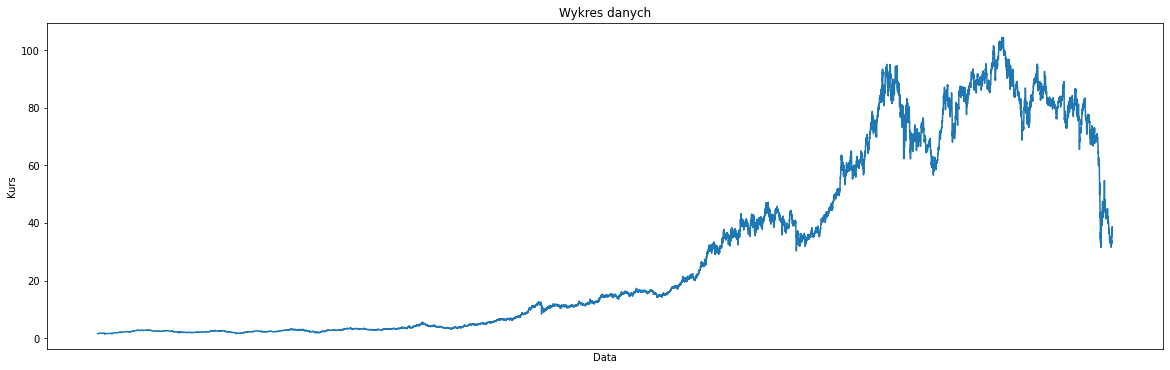

In [ ]:
x_date = df['Date']
y_close = df['Close']
fig = plt.figure(figsize=(20,6))
plt.xlabel('Data')
plt.xticks([])
plt.ylabel('Kurs')
plt.title('Wykres danych')
plt.plot(x_date,y_close)

# 3. Obliczenie logarytmicznych stóp zwrotu pobranych danych oraz stworzenie ich wykresu.

Do obliczenia logarytmicznych stóp zwrotu stosuje się wzór:
log(𝑋𝑡)-log(𝑋𝑡−1) ≈ (𝑋𝑡−𝑋𝑡−1) / 𝑋𝑡
gdzie, 
X - wartośc kursu
t - dana w czasie

In [ ]:
df['return'] = np.log(df.Close) - np.log(df.Close.shift(1))

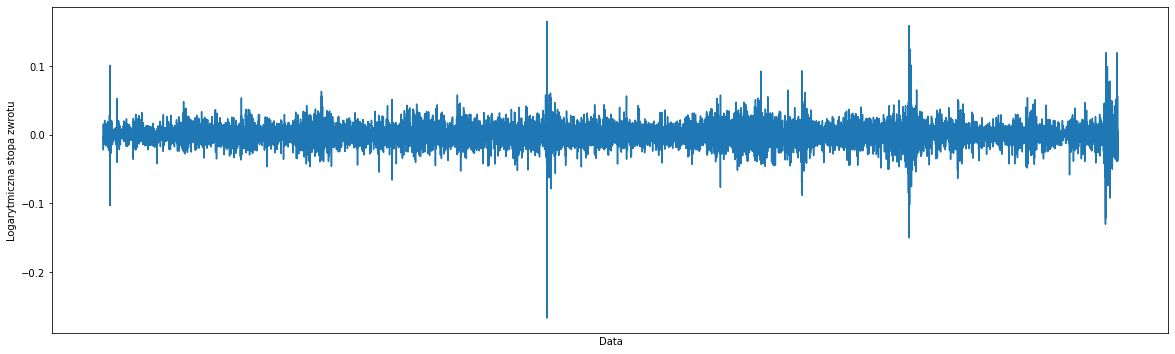

In [ ]:
x_date = df['Date']
y_log = df['return']

fig = plt.figure(figsize=(20,6))
plt.xlabel('Data')
plt.xticks([])
plt.ylabel('Logarytmiczna stopa zwrotu')
plt.plot(x_date,y_log)

# 4. Znormalizowanie szeregu stóp zwrotu (średnia równa 0 i odchylenie standardowe 1)

Normalizacja:
Obliczenie średniej i odchylenia standardowego

In [ ]:
mean = df['return'].mean()
std = df['return'].std()
normalized_df=(df-df.mean())/df.std()
normalized_df['return']
np.std(normalized_df)

Adj Close    0.999966
Close        0.999966
Date              NaN
High         0.999966
Low          0.999966
Open         0.999966
Volume       0.999966
return       0.999966
dtype: float64

Histogram

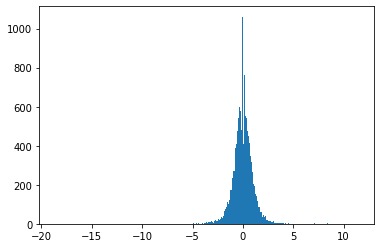

In [ ]:
np_array = normalized_df['return'].to_numpy()
np_array = np_array[np.logical_not(np.isnan(np_array))]
plt.hist(np_array, bins='auto')
plt.show()

Rozkład statystyczny PDF dla danych znormalizowanych

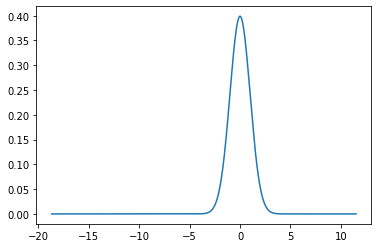

In [ ]:
np_array.sort()
hmean = np.mean(np_array)
hstd = np.std(np_array)
pdf = norm.pdf(np_array, hmean, hstd)
plt.plot(np_array, pdf) 

Rozkład statystyczny danych znormalizowanych i rzeczywistych

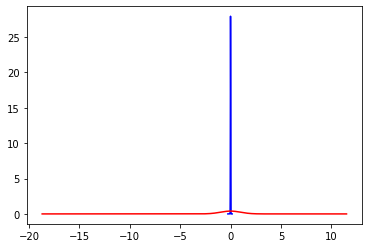

In [ ]:
non_normal = df['return'].to_numpy()
non_normal = non_normal[np.logical_not(np.isnan(non_normal))]
non_normal.sort()

pdf_normalized = norm.pdf(np_array, hmean, hstd)
pdf_non_normal = norm.pdf(non_normal, non_normal.mean(), non_normal.std())

p1 = plt.plot(non_normal, pdf_non_normal, color='blue') 
p2 = plt.plot(np_array, pdf_normalized, color='red') 

plt.show()

Cumulative distribution CDF

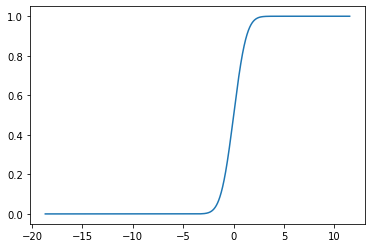

In [ ]:
y = norm.cdf(np_array)
plt.plot(np_array, y)

# Temat 2 Analiza korelacji

# a) Policzenie rozkładu danych

Funkcja korelacji
Wartość +1 to całkowita dodatnia korelacja liniowa, 0 to brak korelacji liniowej, a −1 to całkowita ujemna korelacja liniowa.

In [ ]:
np.corrcoef(df['Close'])

1.0

# b) Analiza rozkładu - skośność i kurtoza

In [ ]:
kurt = kurtosis(np_array)
kurt

17.209995137726445

Kurtoza jest dodatnia co oznacza, że wartości cechy bardziej skoncentrowane niż przy rozkładzie normalnym.
Takie zjawiosko zwane jest leptokuriozą.
W porównaniu z rozkładem normalnym rozkłady stóp zwrotu z giełdy mają wyższy szczyt funkcji gęstoci oraz szerokie końce. 
Oznacza to, że występuje bardzo duże prawdopodobieństwo zmian nietypowych. Dodatkowo wartości są jednocześnie bardziej skupione wokół swojej średniej. 


In [ ]:
skrew = skew(np_array)
skrew

-0.37358372158016406

Skośność < 0 świadczy o lewostronnej asymetrii układu.
Asymetria lewostronna mówi nam, że większa część populacji przyjmuje wartości powyżej przeciętnej.

# c) Obliczenie funkcji autokorelacji.

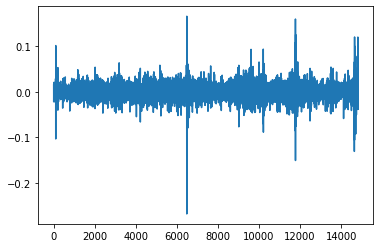

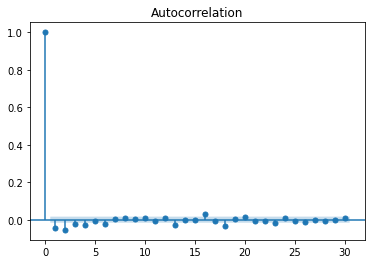

In [ ]:
ret = df['return'].dropna()
fig1 = plt.plot(ret)
fig2 = tsaplots.plot_acf(ret, lags=30)
plt.show()

Autokorelacja informuje nas, w jakim stopniu podane wartości są istotnie powiązane z obserwacjami poprzednio obserwowanymi przy danym przesunięciu w czasie.


# d) Policzenie funkcji autokorelacji dla zmienności sygnału

In [ ]:
def acorr(op_samples, mean, separation, norm = 1):
    return ((op_samples[:op_samples.size-separation] - mean)*(op_samples[separation:]- mean)).ravel().mean() / norm

acorr(df['return'].dropna(), mean, 0)  

0.00020432178363813963

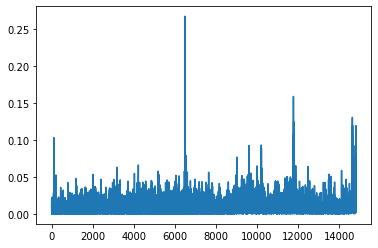

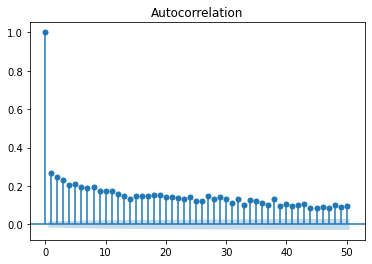

In [ ]:
fig1 = plt.plot(abs(ret))
fig2 = tsaplots.plot_acf(abs(ret), lags=50)
plt.show()

# Rozkład normalny


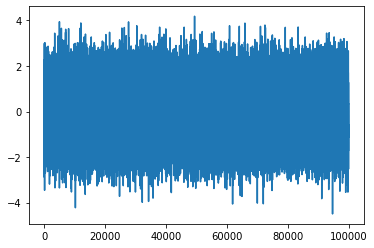

In [ ]:
samplesN = np.random.normal(size=100000)
ret = samplesN
fig1 = plt.plot(ret)

# a) Policzenie rozkładu danych

In [ ]:
np.corrcoef(samplesN)

1.0

In [ ]:
samplesN.mean()
mean

0.00021353435809598175

In [ ]:
samplesN.var()

0.997718412712906

# b) Analiza rozkładu - skośność i kurtoza

In [ ]:
skrew = skew(samplesN)
skrew

0.0013531058862041026

Skośność > 0 świadczy o delikatnej prawostronnej asymetrii układu.
Asymetria prawostronnej mówi nam, że większa część populacji przyjmuje wartości poniżej przeciętnej.

In [ ]:
kurt = kurtosis(samplesN)
kurt

-0.02878157839201556

Kurtoza > 0 świadczy o nieznacznej prawostronnej asymetrii układu. Kurtoza jest dodatnia co oznacza, że wartości cechy bardziej skoncentrowane niz przy rozkładzie normalnym.
Takie zjawiosko zwane jest leptokuriozą. W tym przypadku jest to cecha losowo wygenerowanych próbek.

# c) Obliczenie funkcji autokorelacji.

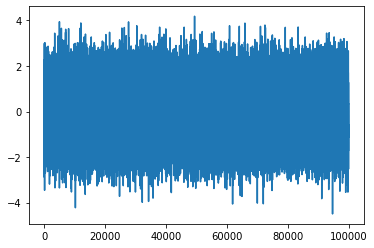

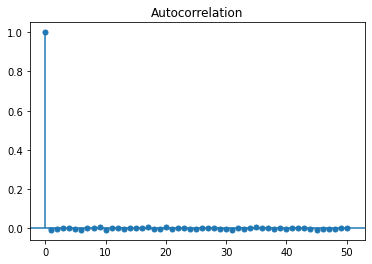

In [ ]:
fig1 = plt.plot(ret)
fig2 = tsaplots.plot_acf(ret, lags=50)
plt.show()

Autokorelacja dla rozkładu normalnego powinna wynosić 0 i dla losowo wygenerowanych próbek oscyluje w jego okolicach, 
co dobrze widoczne jest na powyższym wykresie.

# d) Policzenie funkcji autokorelacji dla zmienności sygnału

In [ ]:
def acorr(op_samples, mean, separation, norm = 1):
    return ((op_samples[:op_samples.size-separation] - mean)*(op_samples[separation:]- mean)).ravel().mean() / norm

acorr(df['return'].dropna(), mean, 0)  

0.00020432178363813963

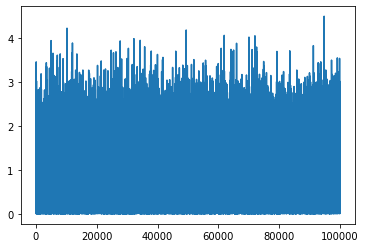

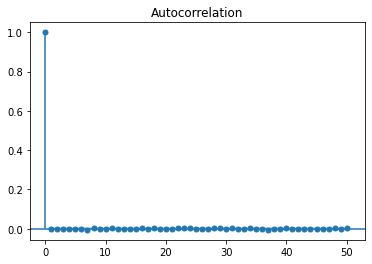

In [ ]:
fig1 = plt.plot(abs(ret))
fig2 = tsaplots.plot_acf(abs(ret), lags=50)
plt.show()

Autokorelacja dla modułu rozkładu normalnego powinna wynosić 0 i dla losowo wygenerowanych próbek oscyluje w jego okolicach, 
co dobrze widoczne jest na powyższym wykresie.